In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from zfa.core.default_dirs import DATA_ROOT

from dandi.dandiapi import DandiAPIClient
from pynwb import NWBHDF5IO
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
DATA_ROOT

'/om2/group/fiete/zfa/'

In [6]:
ls $DATA_ROOT/000350/

dandiset.yaml*   sub-20161206-2/  sub-20170113-4/  sub-20170228-4/
sub-20161022-1/  sub-20170111-1/  sub-20170127-1/
sub-20161109-2/  sub-20170113-2/  sub-20170203-1/
sub-20161206-1/  sub-20170113-3/  sub-20170228-3/


In [21]:
ls $DATA_ROOT/000350/sub-20161022-1/*

/om2/group/fiete/zfa//000350/sub-20161022-1/sub-20161022-1_ses-20161022T151003_ophys.nwb*


In [9]:
f = dandi.files.find_dandi_files(os.path.join(DATA_ROOT, "000350/"))

AttributeError: module 'dandi' has no attribute 'files'

In [12]:
client = DandiAPIClient()

In [13]:
d = client.get_dandiset("000350")

In [15]:
list(d.get_assets())

[RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x14ea90efadf0>, identifier='b4bd25f8-2554-4d79-8ca2-1767857b8bec', path='sub-20170113-2/sub-20170113-2_ses-20170113T124907_ophys.nwb', size=333912192889, created=datetime.datetime(2022, 11, 3, 16, 47, 7, 674561, tzinfo=datetime.timezone.utc), modified=datetime.datetime(2022, 11, 10, 2, 7, 1, 459697, tzinfo=datetime.timezone.utc), blob='7e3e0785-4793-4d7f-b07a-bb2d63b127f2', dandiset_id='000350', version_id='0.221219.1506'),
 RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x14ea90efadf0>, identifier='08939ad0-ff27-404c-aaa4-d71ad11be6c4', path='sub-20170113-3/sub-20170113-3_ses-20170113T150834_ophys.nwb', size=438282035426, created=datetime.datetime(2022, 11, 3, 16, 59, 9, 195757, tzinfo=datetime.timezone.utc), modified=datetime.datetime(2022, 11, 10, 3, 34, 7, 685825, tzinfo=datetime.timezone.utc), blob='297fd6b9-4c28-48c4-8c86-e9ef2a0fb07d', dandiset_id='000350', version_id='0.221219.1506'),
 RemoteBlob

In [17]:
len(list(d.get_assets()))

12

In [44]:
io = NWBHDF5IO(os.path.join(DATA_ROOT, "000350/sub-20161022-1/sub-20161022-1_ses-20161022T151003_ophys.nwb"), mode="r", load_namespaces=True)
nwbfile = io.read()

/om2/user/anayebi/miniconda/envs/pong_env/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [16]:
nwbfile.acquisition['SwimSignals'].data[:100].shape

(100, 2)

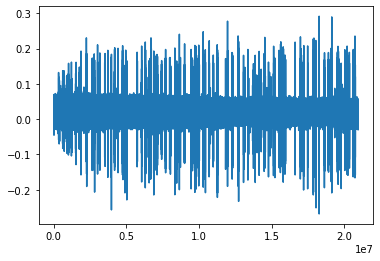

In [18]:
plt.plot(nwbfile.acquisition['SwimSignals'].data[:, 0])

In [19]:
nwbfile.acquisition.keys()

dict_keys(['BaselineStimulusVelocitySignal', 'FrameCaptureTTLSignal', 'StimulusGainSignal', 'StimulusParameterSignals', 'StimulusTypeSignal', 'SwimSignals', 'TotalStimulusVelocitySignal', 'TwoPhotonSeries'])

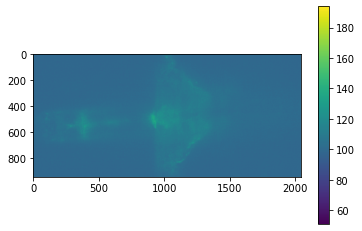

In [45]:
plt.imshow(nwbfile.acquisition['TwoPhotonSeries'].data[0, :, :, 0])
plt.colorbar()

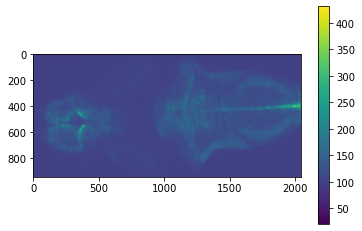

In [46]:
plt.imshow(nwbfile.acquisition['TwoPhotonSeries'].data[0, :, :, 20])
plt.colorbar()

In [29]:
nwbfile.fields

{'session_description': 'A single-color optic channel recording of either a neuron or a glia population.',
 'identifier': '85b1b021-bacf-496f-99ed-db7256104475',
 'session_start_time': datetime.datetime(2016, 10, 22, 15, 10, 3, tzinfo=tzoffset(None, -14400)),
 'timestamps_reference_time': datetime.datetime(2016, 10, 22, 15, 10, 3, tzinfo=tzoffset(None, -14400)),
 'file_create_date': [datetime.datetime(2022, 11, 21, 11, 14, 19, 469846, tzinfo=tzutc())],
 'experimenter': ('Mu, Yu',
  'Bennett, Davis V.',
  'Rubinov, Mikail',
  'Narayan, Sujatha',
  'Yang, Chao-Tsung',
  'Tanimoto, Masashi',
  'Mensh, Brett D.',
  'Looger, Loren L.',
  'Ahrens, Misha B.'),
 'related_publications': ('https://doi.org/10.1016/j.cell.2019.05.050',),
 'acquisition': {'BaselineStimulusVelocitySignal': BaselineStimulusVelocitySignal pynwb.base.TimeSeries at 0x23003440695280
  Fields:
    comments: no comments
    conversion: 1.0
    data: <HDF5 dataset "data": shape (20968915,), type "<f8">
    description: Raw 

In [33]:
nwbfile.acquisition.keys()

dict_keys(['BaselineStimulusVelocitySignal', 'FrameCaptureTTLSignal', 'StimulusGainSignal', 'StimulusParameterSignals', 'StimulusTypeSignal', 'SwimSignals', 'TotalStimulusVelocitySignal', 'TwoPhotonSeries'])

In [43]:
nwbfile.processing['behavior']["ActivityStates"]

ActivityStates pynwb.epoch.TimeIntervals at 0x23003443059536
Fields:
  colnames: ['start_time' 'stop_time' 'state_type']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    state_type <class 'hdmf.common.table.VectorData'>
  )
  description: Classified periods of activity (passive, active, or transient).
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

In [47]:
ls $DATA_ROOT/000350/sub-20170228-3/

sub-20170228-3_ses-20170228T165730_ophys.nwb*


In [3]:
# has both neurons and glia
io = NWBHDF5IO(os.path.join(DATA_ROOT, "000350/sub-20170228-3/sub-20170228-3_ses-20170228T165730_ophys.nwb"), mode="r", load_namespaces=True)
nwbfile = io.read()

/om2/user/anayebi/miniconda/envs/pong_env/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [4]:
nwbfile.acquisition.keys()

dict_keys(['BaselineStimulusVelocitySignal', 'FrameCaptureTTLSignal', 'GliaTwoPhotonSeries', 'NeuronTwoPhotonSeries', 'StimulusGainSignal', 'StimulusParameterSignals', 'StimulusTypeSignal', 'SwimSignals', 'TotalStimulusVelocitySignal'])

In [11]:
nwbfile.processing['ophys']['DfOverF']['GliaDfOverF'].data.shape

(6067, 126467)

In [14]:
nwbfile.processing['ophys']['DfOverF']['NeuronDfOverF'].data.shape

(6067, 111378)

In [4]:
nwbfile.acquisition["GliaTwoPhotonSeries"].data.shape

(6067, 1024, 2048, 28)

In [5]:
nwbfile.acquisition["NeuronTwoPhotonSeries"].data.shape

(6067, 1024, 2048, 28)

Text(0.5, 1.0, 'Glia')

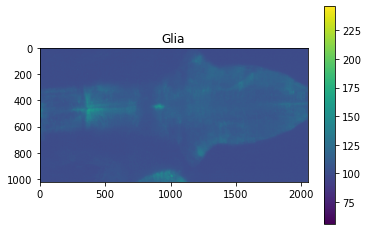

In [9]:
plt.imshow(nwbfile.acquisition["GliaTwoPhotonSeries"].data[1000, :, :, 10])
plt.colorbar()
plt.title("Glia")

Text(0.5, 1.0, 'Neuron')

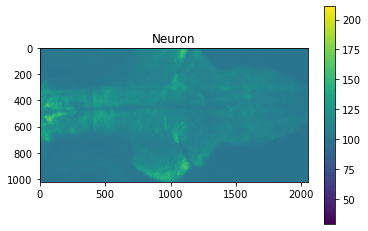

In [10]:
plt.imshow(nwbfile.acquisition["NeuronTwoPhotonSeries"].data[1000, :, :, 10])
plt.colorbar()
plt.title("Neuron")